In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

%load_ext autoreload
%autoreload 1

In [2]:
DF = pd.read_pickle('../../datasets/results/1608030254-df.dat')
DF

metrics                                                                        AUC  \
repetition dataset             classifier          attack     % poisoned             
1          trec2007-1607201347 adaline             dictionary 0.0         0.962768   
                                                              0.1         0.500000   
                                                              0.2         0.500000   
                                                              0.5         0.500000   
                                                   empty      0.0         0.964140   
                                                              0.1         0.957178   
                                                              0.2         0.945280   
                                                              0.5         0.903612   
                                                   ham        0.0         0.964292   
                                                              0.1         0.953977   
                                                              0.2         0.950406   
                                                              0.5         0.500000   
                                                   focussed   0.0         0.963328   
                                                              0.1         0.962858   
                                                              0.2         0.961498   
                                                              0.5         0.961498   
                               logistic regression dictionary 0.0         0.989945   
                                                              0.1         0.988855   
                                                              0.2         0.988406   
                                                              0.5         0.987218   
                                                   empty      0.0         0.990455   
                                                              0.1         0.989398   
                                                              0.2         0.987581   
                                                              0.5         0.989424   
                                                   ham        0.0         0.990553   
                                                              0.1         0.989552   
                                                              0.2         0.988919   
                                                              0.5         0.986299   
                                                   focussed   0.0         0.990102   
                                                              0.1         0.990923   
...                                                                            ...   
20         trec2007-1607252259 logistic regression dictionary 0.2         0.933843   
                                                              0.5         0.923767   
                                                   empty      0.0         0.953615   
                                                              0.1         0.947538   
                                                              0.2         0.949729   
                                                              0.5         0.950477   
                                                   ham        0.0         0.951051   
                                                              0.1         0.953985   
                                                              0.2         0.940438   
                                                              0.5         0.952559   
                                                   focussed   0.0         0.954035   
                                                              0.1         0.946993   
                                                              0.2         0.946205   
                                            

In [3]:
level_names = list(DF.index.names)
level_names.remove('repetition')
level_names.append('repetition')
level_names

['dataset', 'classifier', 'attack', '% poisoned', 'repetition']

In [4]:
## reorder to put repetition at the end of the list
df = DF.reorder_levels(level_names).sort_index()
df = df.ix['trec2007-1607201347']
df

metrics                                            AUC       FNR       FPR  \
classifier  attack     % poisoned repetition                                 
adaline     dictionary 0.0        1           0.962768  0.003431  0.071033   
                                  2           0.962197  0.002316  0.073290   
                                  3           0.962878  0.002747  0.071497   
                                  4           0.964119  0.002866  0.068897   
                                  5           0.963564  0.002674  0.070198   
                                  6           0.964715  0.002547  0.068023   
                                  7           0.962498  0.003151  0.071852   
                                  8           0.962850  0.002760  0.071541   
                                  9           0.965243  0.003055  0.066459   
                                  10          0.964054  0.002704  0.069188   
                                  11          0.964286  0.002404  0.069025   
                                  12          0.963339  0.002435  0.070887   
                                  13          0.963185  0.002710  0.070919   
                                  14          0.962496  0.003103  0.071906   
                                  15          0.963725  0.002997  0.069553   
                                  16          0.962758  0.002319  0.072166   
                                  17          0.962682  0.002474  0.072163   
                                  18          0.962803  0.002577  0.071817   
                                  19          0.962887  0.002072  0.072154   
                                  20          0.962028  0.002922  0.073023   
                       0.1        1           0.500000  1.000000  0.000000   
                                  2           0.500000  1.000000  0.000000   
                                  3           0.500000  1.000000  0.000000   
                                  4           0.500000  1.000000  0.000000   
                                  5           0.500000  1.000000  0.000000   
                                  6           0.500000  1.000000  0.000000   
                                  7           0.500000  1.000000  0.000000   
                                  8           0.500000  1.000000  0.000000   
                                  9           0.500000  1.000000  0.000000   
                                  10          0.500000  1.000000  0.000000   
...                                                ...       ...       ...   
naive bayes ham        0.2        11          0.931881  0.089704  0.046534   
                                  12          0.923550  0.091428  0.061472   
                                  13          0.922728  0.094757  0.059786   
                                  14          0.926850  0.088598  0.057701   
                                  15          0.927583  0.085260  0.059574   
                                  16          0.926673  0.093527  0.053127   
                                  17          0.924025  0.089713  0.062238   
                                  18          0.926645  0.089277  0.057432   
                                  19          0.926736  0.088699  0.057829   
                                  20          0.926019  0.090396  0.057567   
                       0.5        1           0.779862  0.419559  0.020716   
                                  2           0.769843  0.447712  0.012602   
                                  3           0.771136  0.444357  0.013372   
                                  4           0.772578  0.441487  0.013357   
                                  5           0.770174  0.448463  0.011190   
                                  6           0.779235  0.425371  0.016158   
                                  7           0.778247  0.427635  0.015872   
                                  8           0.774383  0.433579  0.017655   
                      

In [5]:
## assuming repetition is at the end
df_mean = df.mean(level=df.index.names[:-1])
df_mean

metrics                                         AUC       FNR       FPR  \
classifier          attack     % poisoned                                 
adaline             dictionary 0.0         0.963254  0.002713  0.070779   
                               0.1         0.500000  1.000000  0.000000   
                               0.2         0.500000  1.000000  0.000000   
                               0.5         0.500000  1.000000  0.000000   
                    empty      0.0         0.963843  0.002669  0.069645   
                               0.1         0.955359  0.002324  0.086958   
                               0.2         0.945653  0.002416  0.106277   
                               0.5         0.903387  0.003322  0.189904   
                    focussed   0.0         0.963954  0.002679  0.069413   
                               0.1         0.914405  0.102892  0.068298   
                               0.2         0.868746  0.202738  0.059771   
                               0.5         0.682402  0.601584  0.033611   
                    ham        0.0         0.963970  0.002735  0.069326   
                               0.1         0.953514  0.003805  0.089167   
                               0.2         0.950158  0.004105  0.095578   
                               0.5         0.500000  1.000000  0.000000   
logistic regression dictionary 0.0         0.990174  0.006080  0.013571   
                               0.1         0.990098  0.006090  0.013713   
                               0.2         0.989215  0.006250  0.015319   
                               0.5         0.987602  0.007773  0.017022   
                    empty      0.0         0.990052  0.005894  0.014001   
                               0.1         0.990034  0.006043  0.013889   
                               0.2         0.989311  0.006558  0.014819   
                               0.5         0.988231  0.006550  0.016988   
                    focussed   0.0         0.990041  0.006493  0.013424   
                               0.1         0.989954  0.006506  0.013586   
                               0.2         0.989584  0.007169  0.013662   
                               0.5         0.987840  0.006754  0.017566   
                    ham        0.0         0.990159  0.005961  0.013720   
                               0.1         0.989255  0.006521  0.014969   
                               0.2         0.988522  0.007365  0.015592   
                               0.5         0.986473  0.009212  0.017843   
naive bayes         dictionary 0.0         0.961845  0.049294  0.027015   
                               0.1         0.534530  0.920419  0.010521   
                               0.2         0.501303  0.995645  0.001748   
                               0.5         0.500000  1.000000  0.000000   
                    empty      0.0         0.962174  0.048666  0.026986   
                               0.1         0.954476  0.050252  0.040796   
                               0.2         0.945844  0.057143  0.051168   
                               0.5         0.918902  0.098656  0.063539   
                    focussed   0.0         0.962217  0.048717  0.026849   
                               0.1         0.922401  0.128223  0.026975   
                               0.2         0.915868  0.133904  0.034359   
                               0.5         0.849503  0.275737  0.025257   
                    ham        0.0         0.962132  0.049105  0.026631   
                               0.1         0.941962  0.059509  0.056568   
                               0.2         0.926077  0.089938  0.057907   
                               0.5         0.776466  0.431486  0.015581   

metrics                                    error_test  error_train  
classifier          attack     % poisoned                           
adaline             dictionary 0.0           0.025508     0.024275  
                               0.1        

In [6]:
df_plot = df_mean.unstack(['attack'])
df_plot

metrics                               AUC                                \
attack                         dictionary     empty  focussed       ham   
classifier          % poisoned                                            
adaline             0.0          0.963254  0.963843  0.963954  0.963970   
                    0.1          0.500000  0.955359  0.914405  0.953514   
                    0.2          0.500000  0.945653  0.868746  0.950158   
                    0.5          0.500000  0.903387  0.682402  0.500000   
logistic regression 0.0          0.990174  0.990052  0.990041  0.990159   
                    0.1          0.990098  0.990034  0.989954  0.989255   
                    0.2          0.989215  0.989311  0.989584  0.988522   
                    0.5          0.987602  0.988231  0.987840  0.986473   
naive bayes         0.0          0.961845  0.962174  0.962217  0.962132   
                    0.1          0.534530  0.954476  0.922401  0.941962   
                    0.2          0.501303  0.945844  0.915868  0.926077   
                    0.5          0.500000  0.918902  0.849503  0.776466   

metrics                               FNR                                \
attack                         dictionary     empty  focussed       ham   
classifier          % poisoned                                            
adaline             0.0          0.002713  0.002669  0.002679  0.002735   
                    0.1          1.000000  0.002324  0.102892  0.003805   
                    0.2          1.000000  0.002416  0.202738  0.004105   
                    0.5          1.000000  0.003322  0.601584  1.000000   
logistic regression 0.0          0.006080  0.005894  0.006493  0.005961   
                    0.1          0.006090  0.006043  0.006506  0.006521   
                    0.2          0.006250  0.006558  0.007169  0.007365   
                    0.5          0.007773  0.006550  0.006754  0.009212   
naive bayes         0.0          0.049294  0.048666  0.048717  0.049105   
                    0.1          0.920419  0.050252  0.128223  0.059509   
                    0.2          0.995645  0.057143  0.133904  0.089938   
                    0.5          1.000000  0.098656  0.275737  0.431486   

metrics                               FPR                                \
attack                         dictionary     empty  focussed       ham   
classifier          % poisoned                                            
adaline             0.0          0.070779  0.069645  0.069413  0.069326   
                    0.1          0.000000  0.086958  0.068298  0.089167   
                    0.2          0.000000  0.106277  0.059771  0.095578   
                    0.5          0.000000  0.189904  0.033611  0.000000   
logistic regression 0.0          0.013571  0.014001  0.013424  0.013720   
                    0.1          0.013713  0.013889  0.013586  0.014969   
                    0.2          0.015319  0.014819  0.013662  0.015592   
                    0.5          0.017022  0.016988  0.017566  0.017843   
naive bayes         0.0          0.027015  0.026986  0.026849  0.026631   
                    0.1          0.010521  0.040796  0.026975  0.056568   
                    0.2          0.001748  0.051168  0.034359  0.057907   
                    0.5          0.000000  0.063539  0.025257  0.015581   

metrics                        error_test                                \
attack                         dictionary     empty  focussed       ham   
classifier          % poisoned                                            
adaline             0.0          0.025508  0.025032  0.024961  0.024999   
                    0.1          0.665426  0.030603  0.091373  0.032386   
                    0.2          0.665822  0.037199  0.154809  0.034675   
                    0.5          0.665389  0.065754  0.412122  0.665813   
logistic regression 0.0          0.008588  0.008599  0.008808  0.008551   
                    0.

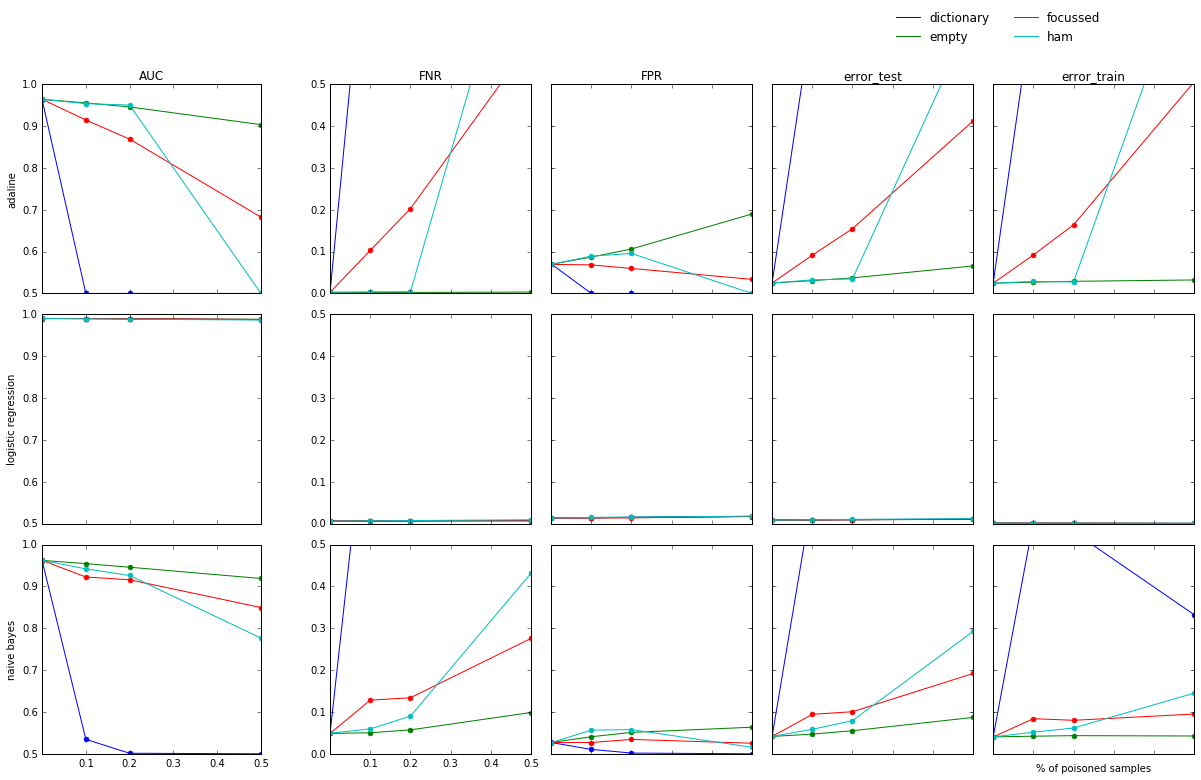

In [8]:

params = {
    'ylim': (0, .5),
    'legend': None,
    'marker': '.',
    'markersize': 10,
}

xticklabels = list(np.arange(0, 0.6, 0.1))
xticklabels.pop(0)
xticklabels.insert(0, '')

## decide on dimension to visualise over the rows
## TODO reorder df levels to put that chosen dimension in front
rows = [lvl for lvl in df.index.levels if lvl.name == 'classifier'][0]
metrics = df.columns


## start plotting
fig = plt.figure(figsize=(16, 4*len(rows)))

## AUC curves
axes_auc = gridspec.GridSpec(len(rows), 1)
axes_auc.update(left=0, right=0.19, wspace=0.1, hspace=0.1)

for idx, row in enumerate(rows):
    axis = plt.subplot(axes_auc[idx, 0])
    
    title = 'AUC' if idx == 0 else None
    df_plot.ix[row]['AUC'].plot(ax=axis, title=title, **params)
    
    axis.set_ylim(.5, 1)
    axis.set_ylabel(row)
    axis.set_xticklabels([])
    axis.set_xlabel('')
    
    if idx == len(rows)-1:
        axis.set_xticklabels(xticklabels)

## other metrics
axes = gridspec.GridSpec(len(rows), len(metrics)-1)
axes.update(left=0.25, right=1, wspace=0.1, hspace=0.1)

for idx, row in enumerate(rows):
    for ic, metric in enumerate(metrics[1:]):
        axis = plt.subplot(axes[idx, ic])
        
        title = metric if idx == 0 else None
        df_plot.ix[row][metric].plot(ax=axis, title=title, sharey=True, **params)
        
        axis.set_xticklabels([])
        axis.set_xlabel('')
        
        if idx == len(rows)-1:
            if ic == 0:
                axis.set_xticklabels(xticklabels)
            if ic == len(metrics)-2:
                axis.set_xlabel('% of poisoned samples')
        
        ## legend
        elif idx == 0 and ic == 3:
            axis.legend()
            _, labels = axis.get_legend_handles_labels()
            new_labels = map(lambda l: l.replace('(', '').replace(')', ''), labels)
            axis.legend(frameon=False, ncol=2, borderaxespad=0, numpoints=1, markerfirst=True, markerscale=0,
                        loc='upper center', bbox_to_anchor=(.83, .99), bbox_transform=fig.transFigure,
                        labels=list(new_labels))

plt.show()

In [9]:
df_plot = df_mean.unstack(['classifier'])
df_plot

metrics                     AUC                                       FNR  \
classifier              adaline logistic regression naive bayes   adaline   
attack     % poisoned                                                       
dictionary 0.0         0.963254            0.990174    0.961845  0.002713   
           0.1         0.500000            0.990098    0.534530  1.000000   
           0.2         0.500000            0.989215    0.501303  1.000000   
           0.5         0.500000            0.987602    0.500000  1.000000   
empty      0.0         0.963843            0.990052    0.962174  0.002669   
           0.1         0.955359            0.990034    0.954476  0.002324   
           0.2         0.945653            0.989311    0.945844  0.002416   
           0.5         0.903387            0.988231    0.918902  0.003322   
focussed   0.0         0.963954            0.990041    0.962217  0.002679   
           0.1         0.914405            0.989954    0.922401  0.102892   
           0.2         0.868746            0.989584    0.915868  0.202738   
           0.5         0.682402            0.987840    0.849503  0.601584   
ham        0.0         0.963970            0.990159    0.962132  0.002735   
           0.1         0.953514            0.989255    0.941962  0.003805   
           0.2         0.950158            0.988522    0.926077  0.004105   
           0.5         0.500000            0.986473    0.776466  1.000000   

metrics                                                     FPR  \
classifier            logistic regression naive bayes   adaline   
attack     % poisoned                                             
dictionary 0.0                   0.006080    0.049294  0.070779   
           0.1                   0.006090    0.920419  0.000000   
           0.2                   0.006250    0.995645  0.000000   
           0.5                   0.007773    1.000000  0.000000   
empty      0.0                   0.005894    0.048666  0.069645   
           0.1                   0.006043    0.050252  0.086958   
           0.2                   0.006558    0.057143  0.106277   
           0.5                   0.006550    0.098656  0.189904   
focussed   0.0                   0.006493    0.048717  0.069413   
           0.1                   0.006506    0.128223  0.068298   
           0.2                   0.007169    0.133904  0.059771   
           0.5                   0.006754    0.275737  0.033611   
ham        0.0                   0.005961    0.049105  0.069326   
           0.1                   0.006521    0.059509  0.089167   
           0.2                   0.007365    0.089938  0.095578   
           0.5                   0.009212    0.431486  0.000000   

metrics                                               error_test  \
classifier            logistic regression naive bayes    adaline   
attack     % poisoned                                              
dictionary 0.0                   0.013571    0.027015   0.025508   
           0.1                   0.013713    0.010521   0.665426   
           0.2                   0.015319    0.001748   0.665822   
           0.5                   0.017022    0.000000   0.665389   
empty      0.0                   0.014001    0.026986   0.025032   
           0.1                   0.013889    0.040796   0.030603   
           0.2                   0.014819    0.051168   0.037199   
           0.5                   0.016988    0.063539   0.065754   
focussed   0.0                   0.013424    0.026849   0.024961   
           0.1                   0.013586    0.026975   0.091373   
           0.2                   0.013662    0.034359   0.154809   
           0.5                   0.017566    0.025257   0.412122   
ham        0.0                   0.013720    0.026631   0.024999   
           0.1                   0.014969    0.056568   0.032386   
           0.2                   0.015592    0.057907   0.034675   
           0.5                   0.017

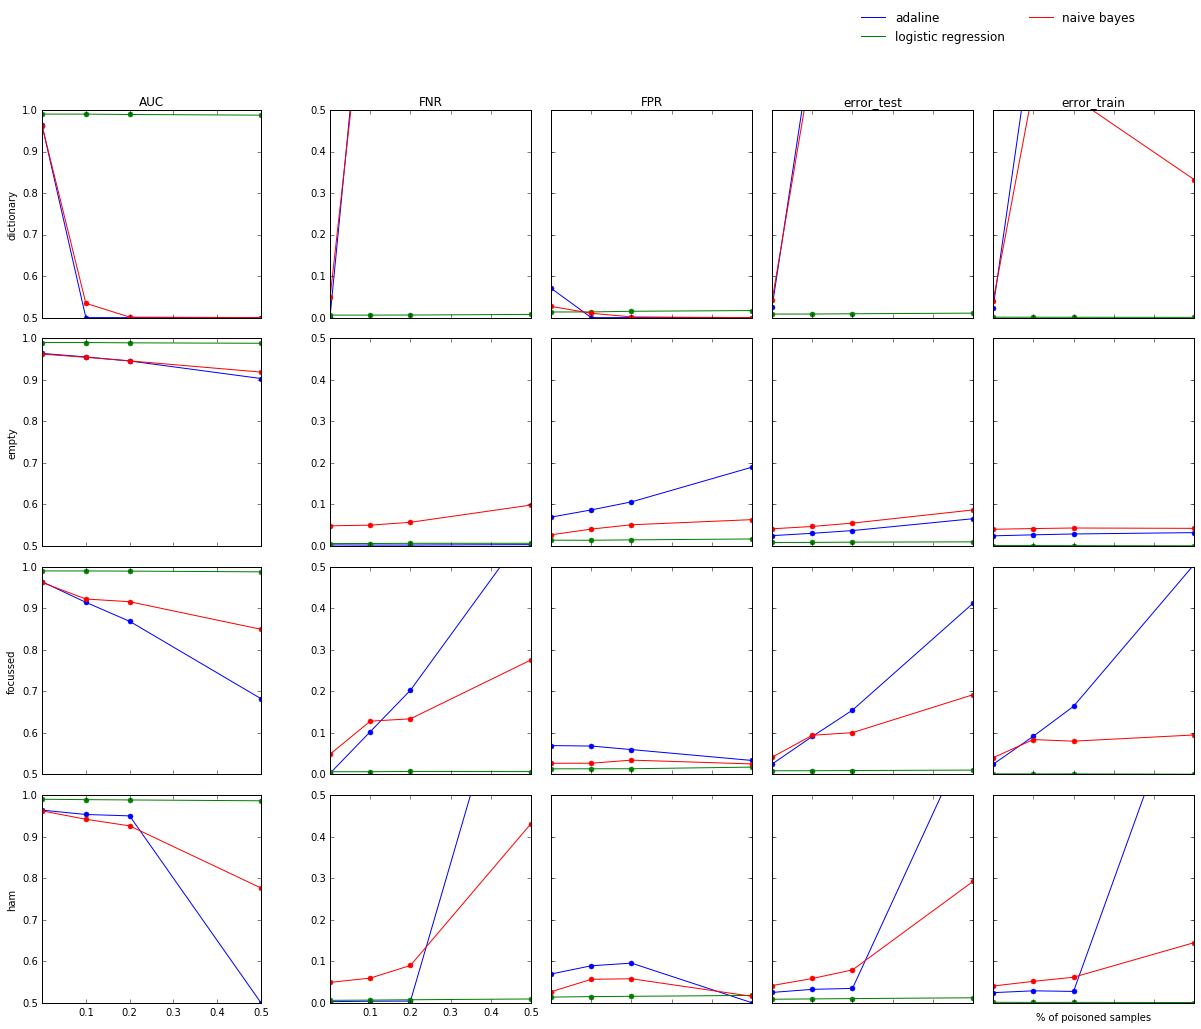

In [11]:

xticklabels = list(np.arange(0, 0.6, 0.1))
xticklabels.pop(0)
xticklabels.insert(0, '')

## decide on dimension to visualise over the rows
## TODO reorder df levels to put that chosen dimension in front
rows = [lvl for lvl in df.index.levels if lvl.name == 'attack'][0]
metrics = df.columns


## start plotting
fig = plt.figure(figsize=(16, 4*len(rows)))

## AUC curves
axes_auc = gridspec.GridSpec(len(rows), 1)
axes_auc.update(left=0, right=0.19, wspace=0.1, hspace=0.1)

for idx, row in enumerate(rows):
    axis = plt.subplot(axes_auc[idx, 0])
    
    title = 'AUC' if idx == 0 else None
    df_plot.ix[row]['AUC'].plot(ax=axis, title=title, **params)
    
    axis.set_ylim(.5, 1)
    axis.set_ylabel(row)
    axis.set_xticklabels([])
    axis.set_xlabel('')
    
    if idx == len(rows)-1:
        axis.set_xticklabels(xticklabels)

## other metrics
axes = gridspec.GridSpec(len(rows), len(metrics)-1)
axes.update(left=0.25, right=1, wspace=0.1, hspace=0.1)

for idx, row in enumerate(rows):
    for ic, metric in enumerate(metrics[1:]):
        axis = plt.subplot(axes[idx, ic])
        
        title = metric if idx == 0 else None
        df_plot.ix[row][metric].plot(ax=axis, title=title, sharey=True, **params)
        
        axis.set_xticklabels([])
        axis.set_xlabel('')
        
        if idx == len(rows)-1:
            if ic == 0:
                axis.set_xticklabels(xticklabels)
            if ic == len(metrics)-2:
                axis.set_xlabel('% of poisoned samples')
        
        ## legend
        elif idx == 0 and ic == 3:
            axis.legend()
            _, labels = axis.get_legend_handles_labels()
            new_labels = map(lambda l: l.replace('(', '').replace(')', ''), labels)
            axis.legend(frameon=False, ncol=2, borderaxespad=0, numpoints=1, markerfirst=True, markerscale=0,
                        loc='upper center', bbox_to_anchor=(.83, .99), bbox_transform=fig.transFigure,
                        labels=list(new_labels))

plt.show()

### With grey lines in background

In [12]:
attack_to_plot = 'focussed'

In [13]:
## with grey lines in the back
df_plot_iters = df.unstack(['classifier', 'repetition']).ix[attack_to_plot]['AUC']
df_plot_iters

classifier   adaline                                                    \
repetition        1         2         3         4         5         6    
% poisoned                                                               
0.0         0.963328  0.963727  0.963104  0.963165  0.964223  0.962009   
0.1         0.962858  0.500000  0.960620  0.962020  0.952392  0.959485   
0.2         0.961498  0.961754  0.500000  0.963632  0.962396  0.960464   
0.5         0.961498  0.955309  0.945716  0.500000  0.500000  0.500000   

classifier                                            ...    naive bayes  \
repetition        7         8         9         10    ...             11   
% poisoned                                            ...                  
0.0         0.964184  0.963828  0.964080  0.964509    ...       0.961434   
0.1         0.960972  0.955145  0.955459  0.958910    ...       0.805451   
0.2         0.961826  0.961684  0.964699  0.963339    ...       0.947149   
0.5         0.500000  0.951032  0.500000  0.500000    ...       0.919234   

classifier                                                              \
repetition        12        13        14        15        16        17   
% poisoned                                                               
0.0         0.962809  0.962947  0.960310  0.962071  0.961038  0.962954   
0.1         0.954179  0.954124  0.955221  0.953300  0.956735  0.952085   
0.2         0.942121  0.940075  0.917506  0.941401  0.944502  0.942193   
0.5         0.885238  0.902595  0.594011  0.903862  0.863291  0.905100   

classifier                                
repetition        18        19        20  
% poisoned                                
0.0         0.961678  0.961197  0.962256  
0.1         0.816861  0.954450  0.955365  
0.2         0.937344  0.946836  0.934720  
0.5         0.889439  0.900034  0.913382  

[4 rows x 60 columns]

In [14]:
df_plot = df.mean(level=df.index.names[:-1]).unstack(['classifier']).ix[attack_to_plot]
df_plot['AUC']

classifier,adaline,logistic regression,naive bayes
% poisoned,,,
0.0,0.963954,0.990041,0.962217
0.1,0.914405,0.989954,0.922401
0.2,0.868746,0.989584,0.915868
0.5,0.682402,0.987840,0.849503


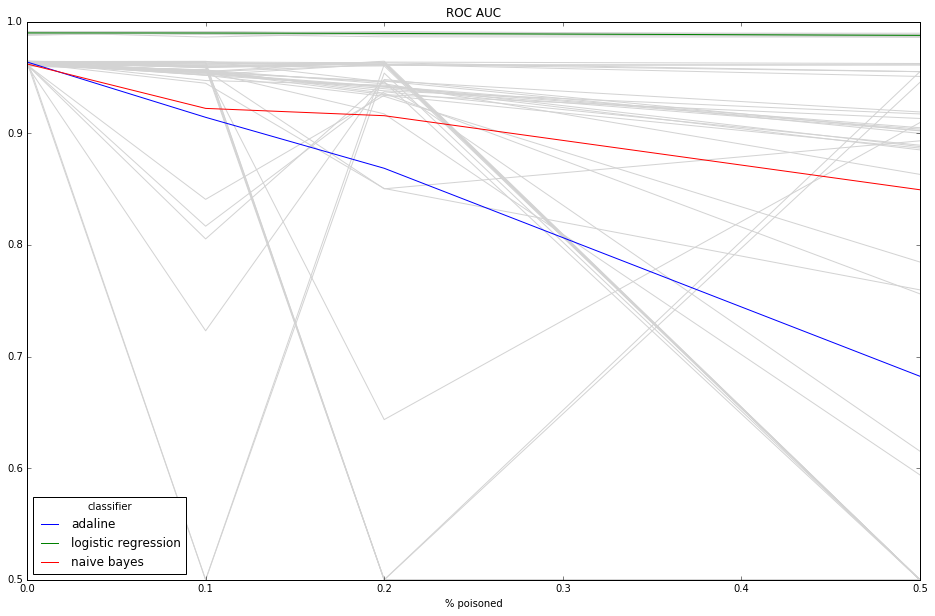

In [15]:
fig, axis = plt.subplots(1,1, figsize=(16,10))
df_plot_iters.plot(ax=axis, color='lightgray', lw=1, legend=None)
df_plot['AUC'].plot(ax=axis)

plt.ylim((0.5, 1))
plt.title('ROC AUC')
plt.show()